# Evaluación Comparativa de Modelos Guardados
Este notebook carga y evalúa todos los modelos guardados en la carpeta `models` usando el set de test. Se reportan métricas y visualizaciones para cada modelo.

In [1]:
# 1. Importar librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

In [2]:
# 2. Definir rutas y clases
MODELS_DIR = '../models'
DATA_PATH = '../data/preprocesadas'
CLASES = ['brain_glioma', 'brain_menin', 'brain_tumor']
IMG_SIZE = (224, 224)
N_CHANNELS = 3

In [3]:
# 3. Cargar datos de test (mismo pipeline que en entrenamiento)
X = []
y = []
for idx, clase in enumerate(CLASES):
    ruta_clase = os.path.join(DATA_PATH, clase)
    imagenes = glob(os.path.join(ruta_clase, '*.jpg'))
    for img_path in imagenes:
        img = Image.open(img_path).convert('L')
        img = img.resize(IMG_SIZE)
        img = np.array(img)
        img_rgb = np.stack([img]*3, axis=-1)
        X.append(img_rgb)
        y.append(idx)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.0

In [4]:
# 4. Cargar splits de test (usando el mismo random_state que en entrenamiento)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y, num_classes=len(CLASES))
_, X_temp, _, y_temp = train_test_split(X, y_cat, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)
print(f'Test set: {X_test.shape[0]} muestras')

Test set: 909 muestras



Evaluando modelo: cnn_mri_20250703_110256_valacc_0.9130.h5


Error evaluando cnn_mri_20250703_110256_valacc_0.9130.h5: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (32, 86528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

Evaluando modelo: cnn_mri_20250703_115128_valacc_0.9185.h5


Error evaluando cnn_mri_20250703_115128_valacc_0.9185.h5: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (32, 86528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

Evaluando modelo: cnn_mri_20250703_131931_valacc_0.8700.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Precisión en test: 0.4015Precisión en test: 0.4015



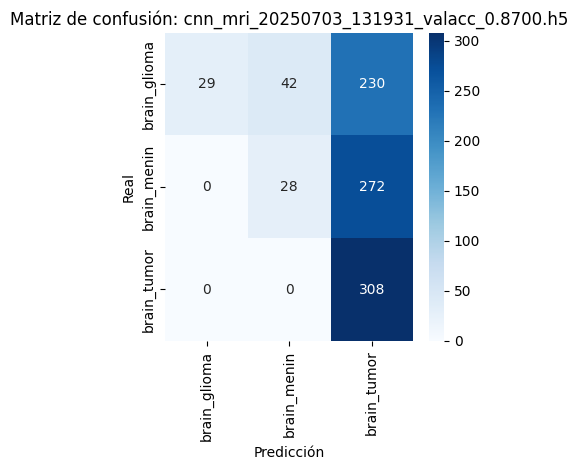

              precision    recall  f1-score   support

brain_glioma       1.00      0.10      0.18       301
 brain_menin       0.40      0.09      0.15       300
 brain_tumor       0.38      1.00      0.55       308

    accuracy                           0.40       909
   macro avg       0.59      0.40      0.29       909
weighted avg       0.59      0.40      0.29       909


Evaluando modelo: cnn_mri_20250703_152727_valacc_0.8800.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Precisión en test: 0.4169
Precisión en test: 0.4169


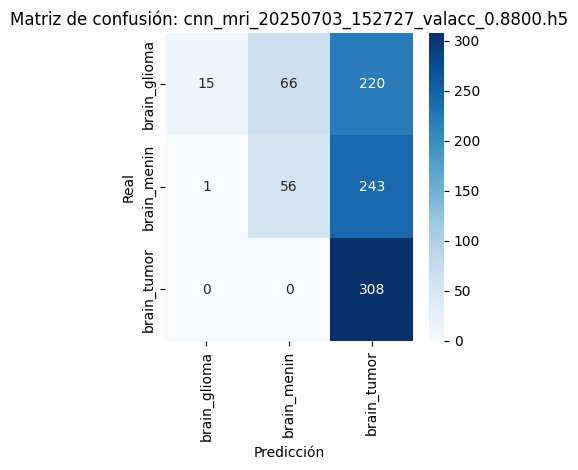

              precision    recall  f1-score   support

brain_glioma       0.94      0.05      0.09       301
 brain_menin       0.46      0.19      0.27       300
 brain_tumor       0.40      1.00      0.57       308

    accuracy                           0.42       909
   macro avg       0.60      0.41      0.31       909
weighted avg       0.60      0.42      0.31       909


Evaluando modelo: cnn_mri_20250703_160214_valacc_0.8888.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Precisión en test: 0.4070Precisión en test: 0.4070



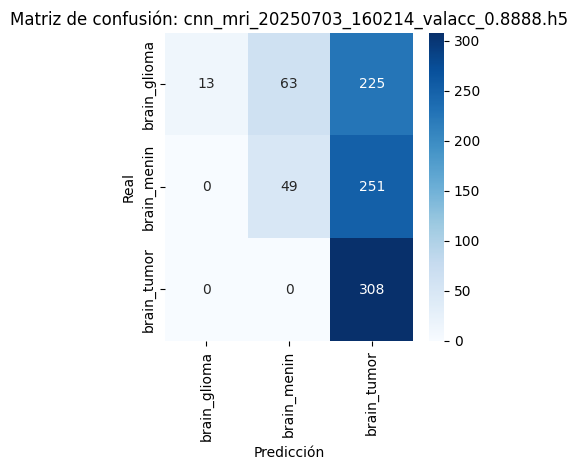

              precision    recall  f1-score   support

brain_glioma       1.00      0.04      0.08       301
 brain_menin       0.44      0.16      0.24       300
 brain_tumor       0.39      1.00      0.56       308

    accuracy                           0.41       909
   macro avg       0.61      0.40      0.29       909
weighted avg       0.61      0.41      0.30       909


Evaluando modelo: cnn_mri_20250703_175723_valacc_0.9020.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Precisión en test: 0.5358
Precisión en test: 0.5358


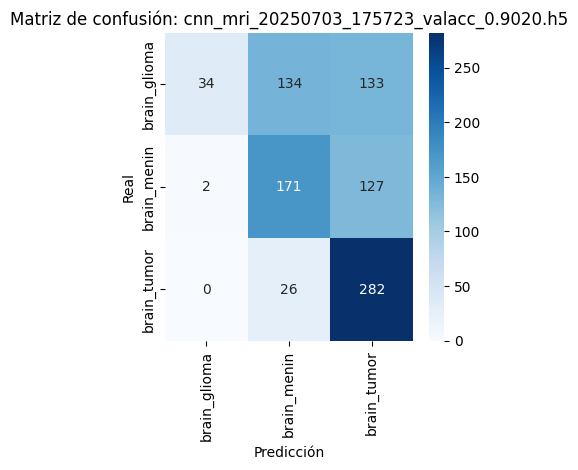

              precision    recall  f1-score   support

brain_glioma       0.94      0.11      0.20       301
 brain_menin       0.52      0.57      0.54       300
 brain_tumor       0.52      0.92      0.66       308

    accuracy                           0.54       909
   macro avg       0.66      0.53      0.47       909
weighted avg       0.66      0.54      0.47       909


Evaluando modelo: cnn_mri_20250703_181622_valacc_0.8711.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Precisión en test: 0.4290
Precisión en test: 0.4290


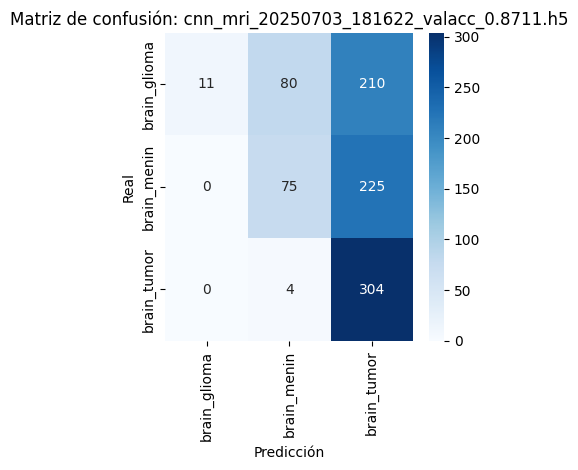

              precision    recall  f1-score   support

brain_glioma       1.00      0.04      0.07       301
 brain_menin       0.47      0.25      0.33       300
 brain_tumor       0.41      0.99      0.58       308

    accuracy                           0.43       909
   macro avg       0.63      0.42      0.33       909
weighted avg       0.63      0.43      0.33       909


Evaluando modelo: cnn_mri_20250703_183653_valacc_0.8513.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Precisión en test: 0.7998Precisión en test: 0.7998



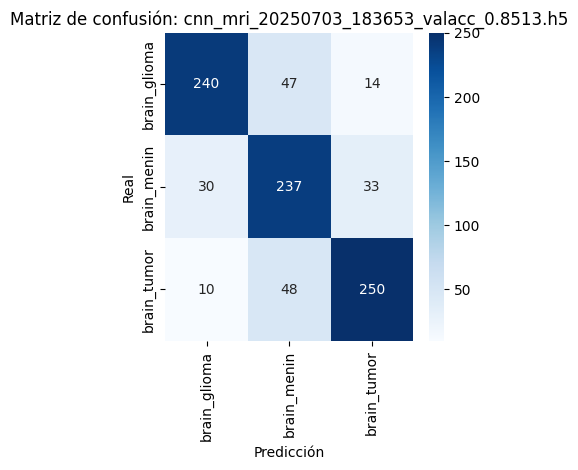

              precision    recall  f1-score   support

brain_glioma       0.86      0.80      0.83       301
 brain_menin       0.71      0.79      0.75       300
 brain_tumor       0.84      0.81      0.83       308

    accuracy                           0.80       909
   macro avg       0.80      0.80      0.80       909
weighted avg       0.80      0.80      0.80       909


Evaluando modelo: cnn_mri_20250703_200502_valacc_0.8524.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step
Precisión en test: 0.8306
Precisión en test: 0.8306


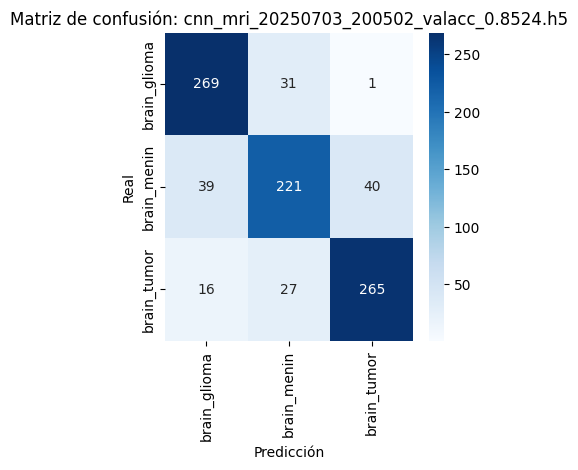

              precision    recall  f1-score   support

brain_glioma       0.83      0.89      0.86       301
 brain_menin       0.79      0.74      0.76       300
 brain_tumor       0.87      0.86      0.86       308

    accuracy                           0.83       909
   macro avg       0.83      0.83      0.83       909
weighted avg       0.83      0.83      0.83       909



In [ ]:
# 5. Evaluar todos los modelos en la carpeta 'models'
modelos = sorted(glob(os.path.join(MODELS_DIR, '*.h5')))
if 'resultados_modelos' not in globals():
    resultados_modelos = []
if not modelos:
    print('No se encontraron modelos en la carpeta models.')
else:
    for modelo_path in modelos:
        print(f'\nEvaluando modelo: {os.path.basename(modelo_path)}')
        model = load_model(modelo_path)
        input_shape = model.input_shape
        # Detectar tipo de entrada
        if len(input_shape) == 4:
            canales = input_shape[-1]
            if canales == 1:
                # Modelos que esperan (224,224,1)
                X_test_eval = np.expand_dims(np.mean(X_test, axis=-1), axis=-1)
            elif canales == 3:
                # Modelos que esperan (224,224,3)
                X_test_eval = X_test
            else:
                print(f'Canales de entrada inesperados: {canales}')
                continue
        elif len(input_shape) == 2:
            # Modelos que esperan vector plano
            X_test_eval = X_test.reshape((X_test.shape[0], -1))
        else:
            print(f'Shape de entrada inesperado: {input_shape}')
            continue
        try:
            preds = model.predict(X_test_eval)
            y_pred = np.argmax(preds, axis=1)
            y_true = np.argmax(y_test, axis=1)
            acc = np.mean(y_pred == y_true)
            resultados_modelos.append((os.path.basename(modelo_path), acc))
            print(f'Precisión en test: {acc:.4f}')
            # Matriz de confusión
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(4,4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASES, yticklabels=CLASES)
            plt.xlabel('Predicción')
            plt.ylabel('Real')
            plt.title(f'Matriz de confusión: {os.path.basename(modelo_path)}')
            plt.show()
            # Reporte de clasificación
            print(classification_report(y_true, y_pred, target_names=CLASES))
        except Exception as e:
            print(f"Error evaluando {os.path.basename(modelo_path)}: {e}")

In [11]:
# 6. Resumen: Mejor modelo por precisión en test

# Suponiendo que la celda anterior se ha ejecutado y se han evaluado todos los modelos
# Guardamos los resultados en una lista temporal
if 'resultados_modelos' not in globals():
    resultados_modelos = []

# Modifica la celda de evaluación para agregar:
# resultados_modelos.append((os.path.basename(modelo_path), acc))
# después de calcular acc para cada modelo

if resultados_modelos:
    mejor = max(resultados_modelos, key=lambda x: x[1])
    print(f"\nMejor modelo: {mejor[0]}")
    print(f"Precisión en test: {mejor[1]:.4f}")
    # Mostrar ranking completo
    print("\nRanking de modelos por precisión:")
    for nombre, acc in sorted(resultados_modelos, key=lambda x: x[1], reverse=True):
        print(f"{nombre}: {acc:.4f}")
else:
    print("Ejecuta la celda de evaluación primero para obtener los resultados.")


Mejor modelo: cnn_mri_20250703_200502_valacc_0.8524.h5
Precisión en test: 0.8306

Ranking de modelos por precisión:
cnn_mri_20250703_200502_valacc_0.8524.h5: 0.8306
cnn_mri_20250703_183653_valacc_0.8513.h5: 0.7998
cnn_mri_20250703_175723_valacc_0.9020.h5: 0.5358
cnn_mri_20250703_181622_valacc_0.8711.h5: 0.4290
cnn_mri_20250703_152727_valacc_0.8800.h5: 0.4169
cnn_mri_20250703_160214_valacc_0.8888.h5: 0.4070
cnn_mri_20250703_131931_valacc_0.8700.h5: 0.4015
